In [120]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from natsort import natsorted

In [2]:
file_path = "/home/s2208943/ipdis/data/MSS3_Maria_analysis/WMH_inter_observer_voxelwise_analysis/Voxelwise_agreement.xlsx"

In [3]:
df = pd.read_excel(file_path)

In [4]:
df

,Dataset ID,WMH1_mm3,WMH2_mm3,ICV_mm3,JI,DSC,TPF_1,TPF_2,TNF_1,TNF_2
0,MSS3_ED_001_V1,6825,6578,1886164,0.517206,0.681788,0.669451,0.694588,0.998931,0.998800
1,MSS3_ED_001_V2a,11215,13999,1886164,0.758789,0.862854,0.969951,0.777056,0.998335,0.999820
2,MSS3_ED_001_V2b,11452,13947,1886164,0.752018,0.858459,0.951973,0.781673,0.998376,0.999706
3,MSS3_ED_001_V3,12023,14612,1886164,0.734049,0.846630,0.937786,0.771626,0.998219,0.999600
4,MSS3_ED_002_V1,56156,56042,2393629,0.885681,0.939375,0.938422,0.940330,0.998569,0.998521
...,...,...,...,...,...,...,...,...,...,...
57,MSS3_ED_075_V1,6657,6738,1954902,0.062758,0.118104,0.118822,0.117394,0.996948,0.996989
58,MSS3_ED_077_V1,2712,3266,2113593,0.827576,0.905654,0.998156,0.828843,0.999735,0.999998
59,MSS3_ED_078_V1,8459,10288,1742275,0.031983,0.061983,0.068684,0.056474,0.994401,0.995451
60,MSS3_ED_079_V1,6110,6956,1560672,0.030442,0.059085,0.063175,0.055492,0.995774,0.996316


Text(0.5, 1.0, 'Rater 1 volume vs Rater 2 volume')

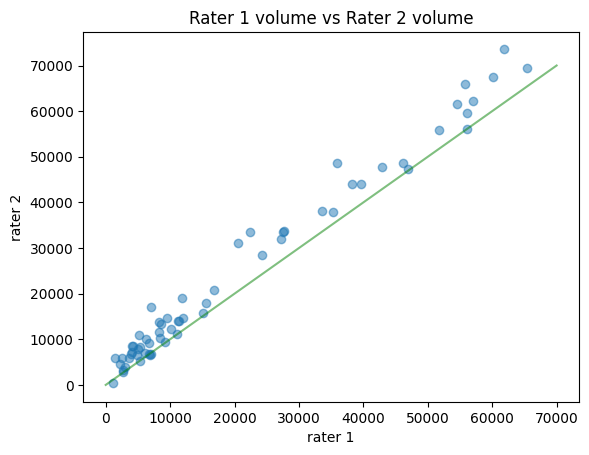

In [5]:
plt.plot([0, 70000], [0, 70000], c='green', alpha=0.5)
plt.scatter(df["WMH1_mm3"], df["WMH2_mm3"], alpha=0.5)
plt.xlabel("rater 1")
plt.ylabel("rater 2")
plt.title("Rater 1 volume vs Rater 2 volume")

Text(0, 0.5, 'Dice between raters')

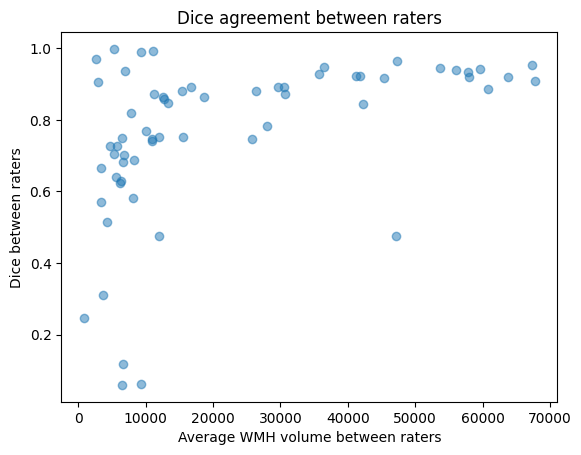

In [90]:
plt.scatter((df["WMH1_mm3"] + df["WMH2_mm3"]) / 2, df["DSC"], alpha=0.5)
plt.title("Dice agreement between raters")
plt.xlabel("Average WMH volume between raters")
plt.ylabel("Dice between raters")

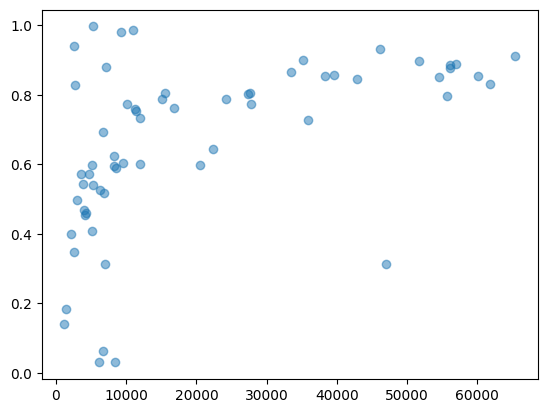

In [7]:
plt.scatter(df["WMH1_mm3"], df["JI"], alpha=0.5)

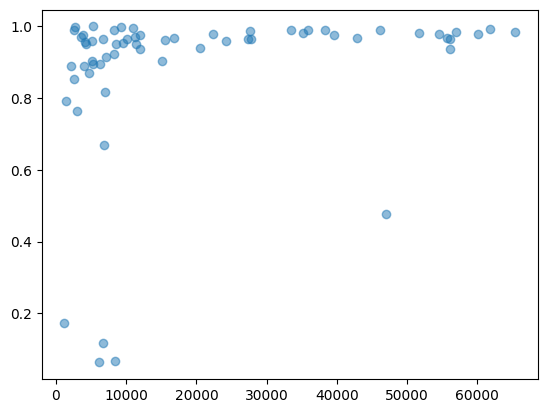

In [8]:
plt.scatter(df["WMH1_mm3"], df["TPF_1"], alpha=0.5)

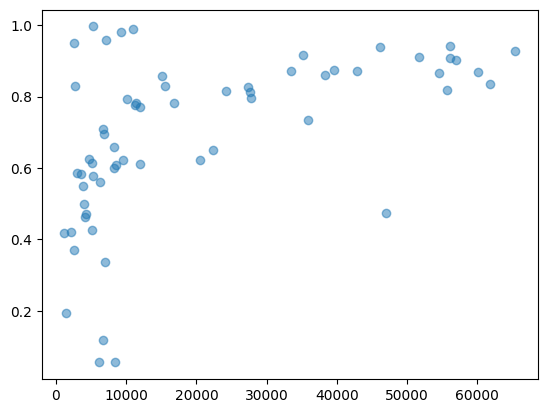

In [9]:
plt.scatter(df["WMH1_mm3"], df["TPF_2"], alpha=0.5)

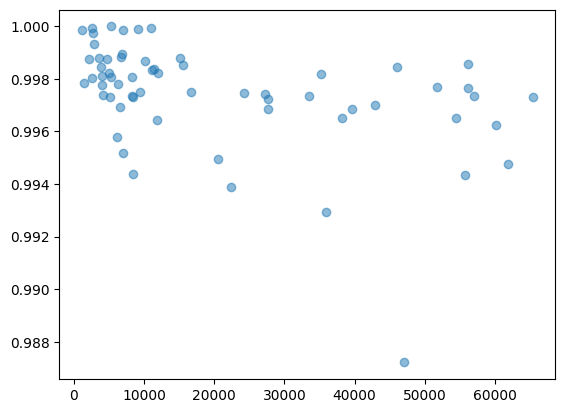

In [10]:
plt.scatter(df["WMH1_mm3"], df["TNF_1"], alpha=0.5)

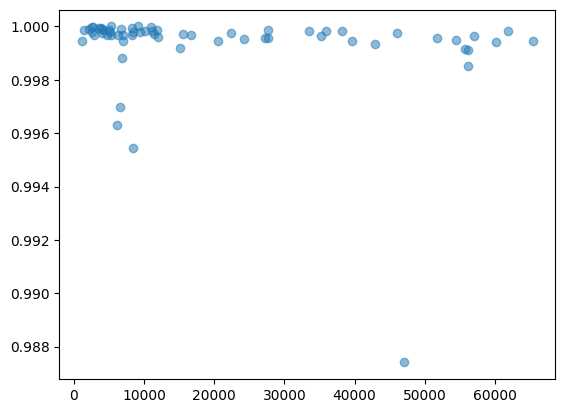

In [11]:
plt.scatter(df["WMH1_mm3"], df["TNF_2"], alpha=0.5)

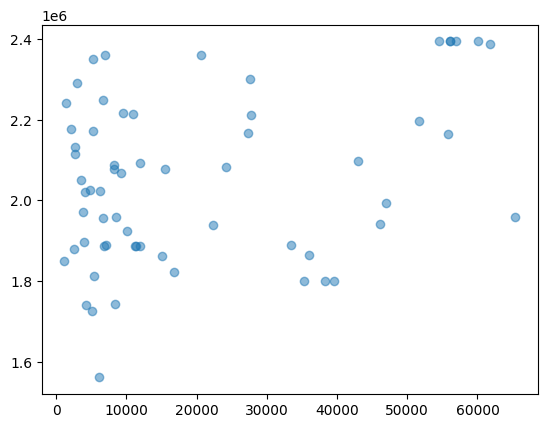

In [12]:
plt.scatter(df["WMH1_mm3"], df["ICV_mm3"], alpha=0.5)

In [168]:
import matplotlib.font_manager as fm
from matplotlib.font_manager import FontProperties
fm.fontManager.addfont('/home/s2208943/fonts/Libre_Baskerville/LibreBaskerville-Bold.ttf')
prop = FontProperties(fname="/home/s2208943/fonts/Libre_Baskerville/LibreBaskerville-Bold.ttf")

In [172]:
font = "Libre Baskerville"

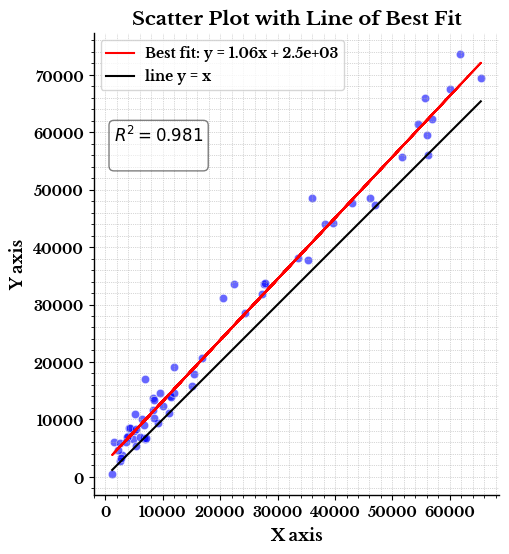

In [187]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Example data
x = df["WMH1_mm3"]
y = df["WMH2_mm3"]

# Calculate line of best fit
slope, intercept, r_value, p_value, std_err = linregress(x, y)
line = slope * x + intercept

# Create scatter plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x, y, color='blue', alpha=0.6, edgecolors='w', linewidth=0.5)

# Plot line of best fit
plt.plot(x, line, color='red', label=f'Best fit: y = {slope:.2f}x + {intercept:.2}')
plt.plot([min(x), max(x)], [min(x), max(x)], color='black', label=f'line y = x')

# Annotate with text (R^2 and line equation)
plt.text(0.05, 0.80, f'$R^2 = {r_value**2:.3f}$\n', transform=plt.gca().transAxes,
         fontsize=12, fontname=font, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

# Enhance aesthetics
plt.title('Scatter Plot with Line of Best Fit', fontsize=14, fontname=font)
plt.xlabel('X axis', fontsize=12, fontname=font)
plt.ylabel('Y axis', fontsize=12, fontname=font)
plt.legend(fontsize=12, prop=prop)

plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.minorticks_on()


# Remove right and top spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make left and bottom spines thicker
ax.spines['left'].set_linewidth(1.)
ax.spines['bottom'].set_linewidth(1.)

ax.set_aspect('equal', adjustable='box')

for tick in ax.get_xticklabels():
    tick.set_fontname(font)
    # tick.set_fontweight("bold")
for tick in ax.get_yticklabels():
    tick.set_fontname(font)
    # tick.set_fontweight("bold")

# Show plot
plt.show()


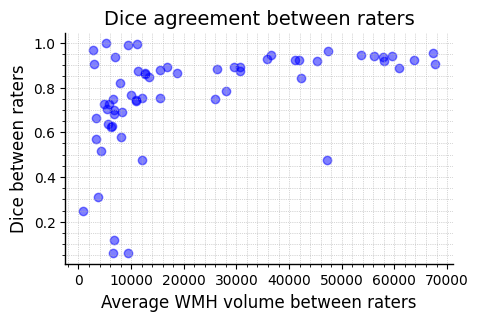

In [167]:
# Create scatter plot
fig, ax = plt.subplots(figsize=(5, 3))
y = df["DSC"]
x = (df["WMH1_mm3"] + df["WMH2_mm3"]) / 2
ax.scatter(x, y, alpha=0.5, c='blue')

# annotation
plt.title("Dice agreement between raters", fontsize=14)
plt.xlabel("Average WMH volume between raters", fontsize=12)
plt.ylabel("Dice between raters", fontsize=12)

# grid
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.minorticks_on()


# Remove right and top spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# # Make left and bottom spines thicker
ax.spines['left'].set_linewidth(1.)
ax.spines['bottom'].set_linewidth(1.)

In [123]:
np.sort(x)

array([  846. ,  2692. ,  2989. ,  3398.5,  3404.5,  3738. ,  4230.5,
        4802. ,  5313. ,  5354. ,  5586. ,  5716. ,  6271. ,  6389.5,
        6495.5,  6533. ,  6697.5,  6701.5,  6818. ,  6913.5,  7881. ,
        8096. ,  8224. ,  9325.5,  9373.5,  9999. , 10918. , 10999.5,
       11066. , 11229.5, 11999. , 12034. , 12607. , 12699.5, 13317.5,
       15468.5, 15494. , 16733. , 18742. , 25844.5, 26374. , 27961. ,
       29600.5, 30593. , 30702.5, 35800. , 36523. , 41176.5, 41848.5,
       42241. , 45333.5, 47151.5, 47345. , 53728. , 56099. , 57836.5,
       57973.5, 59614.5, 60809. , 63803.5, 67398. , 67735.5])

Text(0.5, 0, 'Mean WMH Volume between raters')

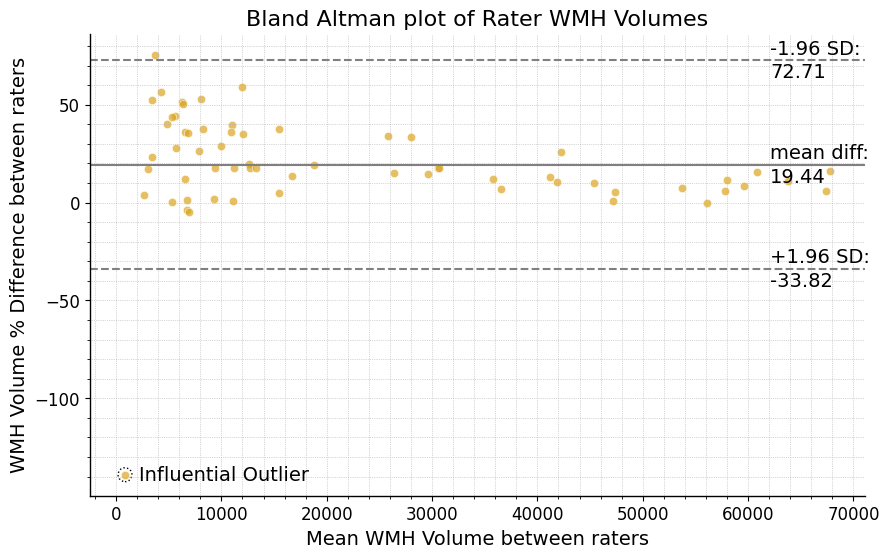

In [88]:
x = df["WMH1_mm3"]
y = df["WMH2_mm3"]
diff = (y - x)
percent_diff = 100 * diff / y
mean_percent_diff = np.mean(percent_diff)
mean = (x + y) / 2
std = np.std(percent_diff, ddof=1)
conf_bound_95 = 1.96 * std

fontsize = 14

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(mean, percent_diff, color='goldenrod', alpha=0.7, edgecolors='w', linewidth=0.5)

# mean and 95% confidence lines
ax.axhline(y=mean_percent_diff, color='gray')
rhs_point = max(x) * 0.95
ax.text(rhs_point, mean_percent_diff + 1, 'mean diff:', verticalalignment='bottom', horizontalalignment='left', fontsize=fontsize)
ax.text(rhs_point, mean_percent_diff - 11, f'{mean_percent_diff:.2f}', verticalalignment='bottom', horizontalalignment='left', fontsize=fontsize)
ax.axhline(y=mean_percent_diff - conf_bound_95, color='gray', linestyle='--')
ax.text(rhs_point, mean_percent_diff - conf_bound_95 + 1, '+1.96 SD:', verticalalignment='bottom', horizontalalignment='left', fontsize=fontsize)
ax.text(rhs_point, mean_percent_diff - conf_bound_95 - 11, f'{mean_percent_diff - conf_bound_95:.2f}', verticalalignment='bottom', horizontalalignment='left', fontsize=fontsize)
ax.axhline(y=mean_percent_diff + conf_bound_95, color='gray', linestyle='--')
ax.text(rhs_point, mean_percent_diff + conf_bound_95 + 1, '-1.96 SD:', verticalalignment='bottom', horizontalalignment='left', fontsize=fontsize)
ax.text(rhs_point, mean_percent_diff + conf_bound_95 - 11, f'{mean_percent_diff + conf_bound_95:.2f}', verticalalignment='bottom', horizontalalignment='left', fontsize=fontsize)

# point out influential outliers
outlier_sd = 3
for (m, pd) in zip(mean, percent_diff):
    if pd > mean_percent_diff + (3 * std) or pd < mean_percent_diff - (3 * std):
        scatter = ax.scatter(m, pd, facecolors='none', edgecolors='black', linewidth=1, s=100, linestyle=':')
        ax.text(m + max(x) * 0.02, pd, 'Influential Outlier', verticalalignment='center', horizontalalignment='left', fontsize=fontsize)

# spines and ticks
ax = plt.gca() # Get current axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.)
ax.spines['bottom'].set_linewidth(1.)
plt.minorticks_on()
ax.tick_params(axis='both', labelsize=fontsize-2)

# legend
# plt.legend(fontsize=12)

# grid
plt.grid(True, which='both', linestyle=':', linewidth=0.5)


plt.title("Bland Altman plot of Rater WMH Volumes", fontsize=fontsize+2)
plt.ylabel("WMH Volume % Difference between raters", fontsize=fontsize)
plt.xlabel("Mean WMH Volume between raters", fontsize=fontsize)



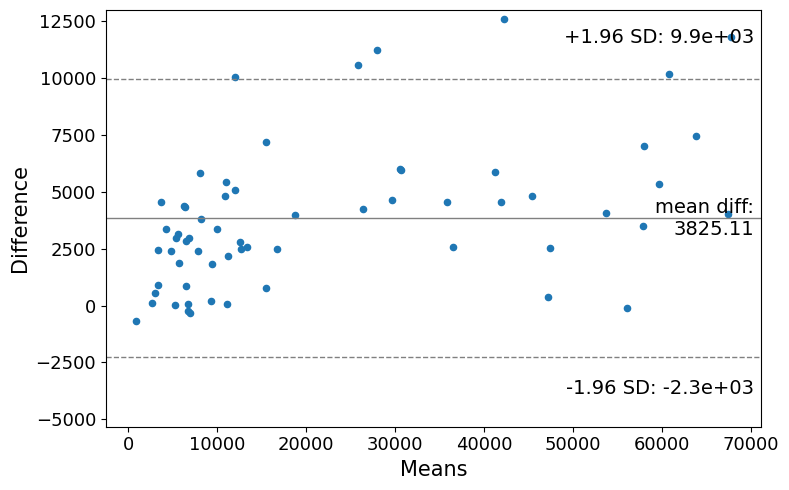

In [98]:

#create Bland-Altman plot                  
f, ax = plt.subplots(1, figsize = (8,5))
sm.graphics.mean_diff_plot(y, x, ax = ax)

#display Bland-Altman plot
plt.show()

In [99]:
np.mean(x-y)

-3825.1129032258063

In [101]:
sem = np.std(x-y, ddof=1) / np.sqrt(len(x))

In [102]:
sem

398.2267311532356

In [105]:
-1.96 * np.std(y-x, ddof=1) + np.mean(y-x)

-2320.7423135896147

In [89]:
len(x)

62